In [1]:
from func import DataProcessor,TipFinder,VertexPos
import seaborn as sns
from plotly.offline import iplot,plot
import numpy as np
import pylab as plt
import pandas as pd
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (20, 20)


In [3]:
dp = DataProcessor('../../data/SQL/10C/85_8.db','../../data/SQL/10C/ProtoMap.db')

initialization will take some time
6.27858996391
   PadNum        PadName     PadX      PadY  BinNum
0       0  sector_center  0.00000  0.000000     257
1       1      sector1_0  1.30108  0.947523       1
2       2      sector2_0  2.18496  1.831410       2
3       3      sector1_1  2.71529  2.361740       3
4       4      sector2_1  3.59917  3.245620       4
loading finished
begin processing
1.00067996979
2.21567320824
processing finished


In [4]:
EID = 1
tmp = dp.t3[(dp.t3['EventID']==EID)&(dp.t3['charge']>3)].copy()
p = (tmp['PadNum']-1)%63+1

tmp['PadPos'] = ((p-9)*(p>9)+p)*(tmp['PadNum']!=0)

Q1 = tmp[(tmp['PadX']>0)&(tmp['PadY']>0)]
Q2 = tmp[(tmp['PadX']<0)&(tmp['PadY']>0)]
Q3 = tmp[(tmp['PadX']<0)&(tmp['PadY']<0)]
Q4 = tmp[(tmp['PadX']>0)&(tmp['PadY']<0)]


image1 = np.zeros([300,600])
image1[(Q1['PadPos'].values+150).astype(np.int), Q1['time'].values.astype(np.int)] =255

image2 = np.zeros([300,600])
image2[(-Q3['PadPos'].values+150).astype(np.int), Q3['time'].values.astype(np.int)] =255

image3 = np.zeros([300,600])
image3[(Q2['PadPos'].values+150).astype(np.int), Q2['time'].values.astype(np.int)] =255

image4 = np.zeros([300,600])
image4[(-Q4['PadPos'].values+150).astype(np.int), Q4['time'].values.astype(np.int)] =255




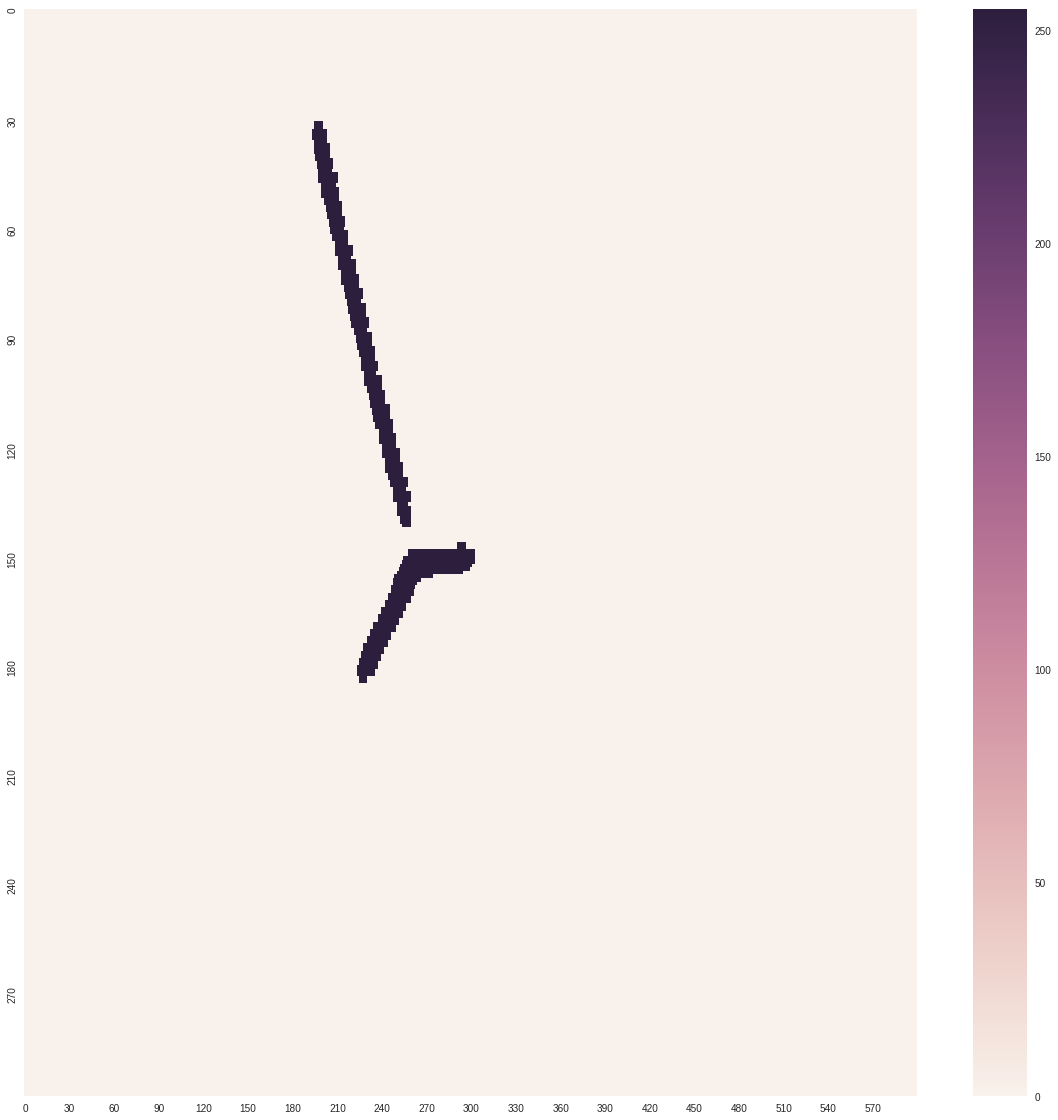

In [5]:
pic = dp.Process(2)
sns.heatmap(pic[::-1], xticklabels=30, yticklabels=30)
pic_ = np.copy(pic)

score,y0,y1 = VertexPos(pic_)
points = TipFinder(pic_)
x,y= points[points[:,0].argsort()][-1]

301.114521551


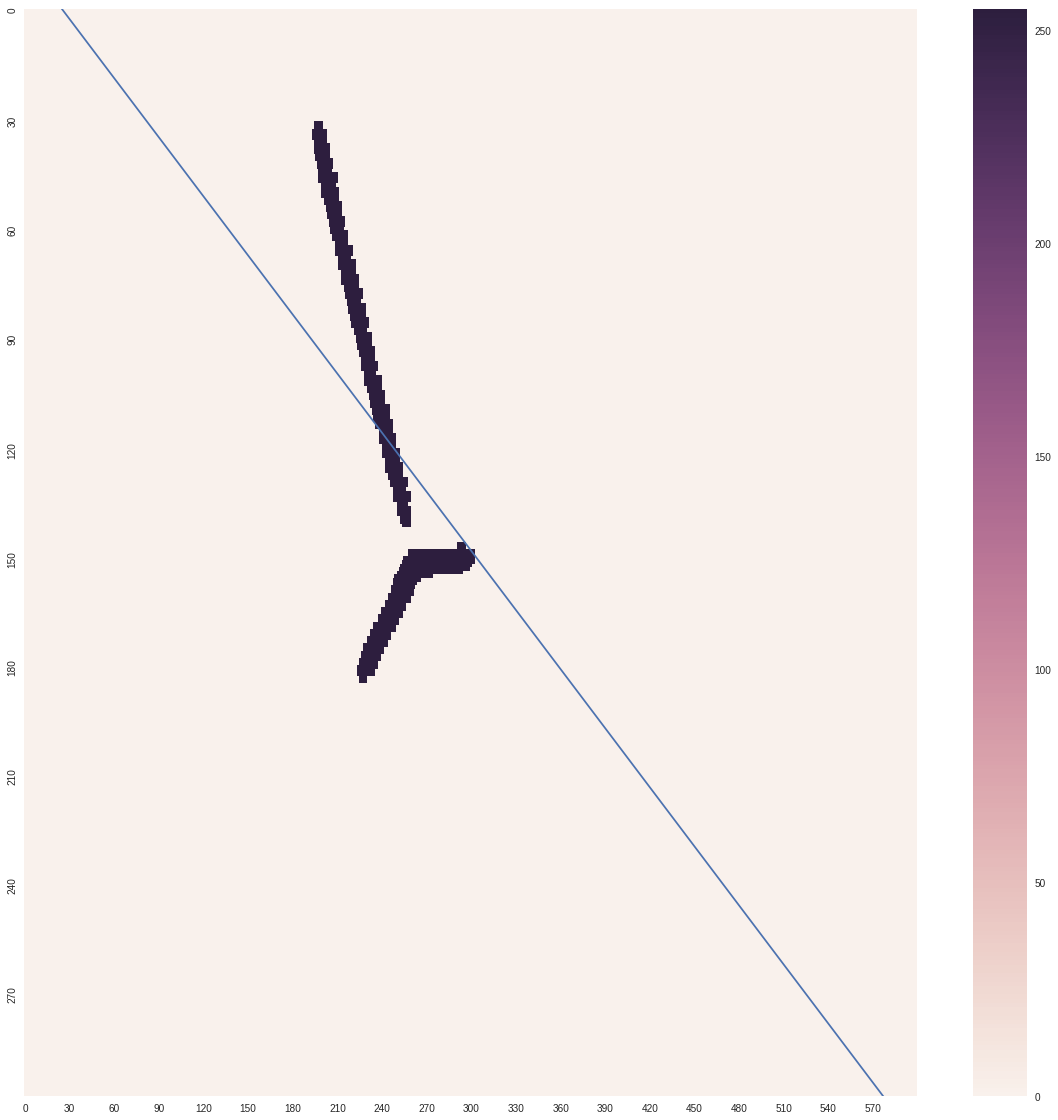

In [6]:


image = np.copy(image1)
width = 15
image[y-width:y+width] = 0

ys,xs = np.where(image)


#sns.heatmap(image[::-1], xticklabels=30, yticklabels=30)

k,b = np.polyfit(xs,ys,1)
plt.plot(np.linspace(0,600),b+k*np.linspace(0,600))
np.sum(image>10)
xc = (y-b)/k


#pic[:,:int(xc)] = 0
sns.heatmap(pic[::-1], xticklabels=30, yticklabels=30)
print xc
